##  Importing Essential Libraries


This cell imports key Python libraries used for data science and visualization:

- **NumPy (np)** – For numerical computations and array handling.
- **Pandas (pd)** – For data manipulation and analysis using DataFrames.
- **Matplotlib.pyplot (plt)** – For creating visualizations and plots.
- **Seaborn (sns)** – For statistical data visualization with a high-level interface.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

This cell reads the CSV file **"Advertising Budget and Sales.csv"** from Google Drive into a Pandas DataFrame named df. The head() function is then used to display the first five rows of the dataset, giving a quick preview of its structure and contents.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Advertising Budget and Sales.csv')
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Inspecting Dataset Structure

This cell displays a summary of the DataFrame using the info() method. It includes information about the number of entries, column names, non-null counts, and data types, which helps in understanding the dataset’s structure and identifying any missing values.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Checking for Missing Values

This cell checks for missing values in each column of the DataFrame using the isna().sum() method. It returns the total number of null (NaN) entries per column, helping to identify if any data cleaning is required.


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
TV Ad Budget ($),0
Radio Ad Budget ($),0
Newspaper Ad Budget ($),0
Sales ($),0


## Checking for Duplicate Rows

This cell identifies duplicate rows in the DataFrame using the duplicated().sum() method. It returns the total count of duplicate entries, which is useful for ensuring data quality and integrity.


In [ ]:
df.duplicated().sum()

np.int64(0)

## Generating Summary Statistics

This cell uses the describe() method to generate summary statistics for the numerical columns in the DataFrame. It provides key metrics such as count, mean, standard deviation, minimum, maximum, and the 25th, 50th, and 75th percentiles, offering insights into the distribution and spread of the data.


In [ ]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Dropping Unnecessary Column

This cell removes the column 'Unnamed: 0' from the DataFrame using the drop() method. This column represents the serial number and is not needed for analysis, so it is dropped to clean up the dataset.


In [ ]:
df = df.drop('Unnamed: 0',axis = 1)

In [ ]:
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Visualizing Correlation Matrix

This cell creates a heatmap of the correlation matrix for the DataFrame using Seaborn's heatmap() function. The annot=True parameter displays the correlation coefficients on the heatmap, helping to visualize relationships between numerical variables.


<Axes: >

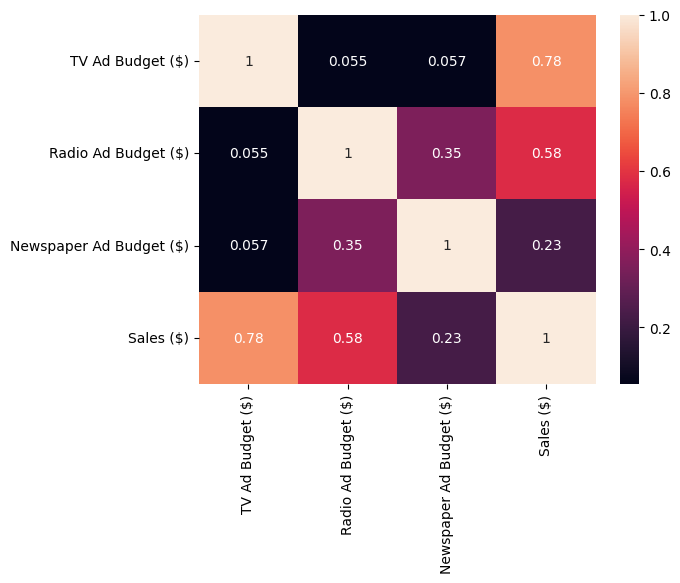

In [ ]:
sns.heatmap(df.corr(),annot=True)

## Pairwise Relationships Visualization

This cell generates pairwise scatter plots for all numerical variables in the DataFrame using Seaborn's pairplot() function. The figure size is set to 10x10 inches to improve readability. This visualization helps in identifying patterns, relationships, and potential correlations between variables.


<Figure size 1000x1000 with 0 Axes>

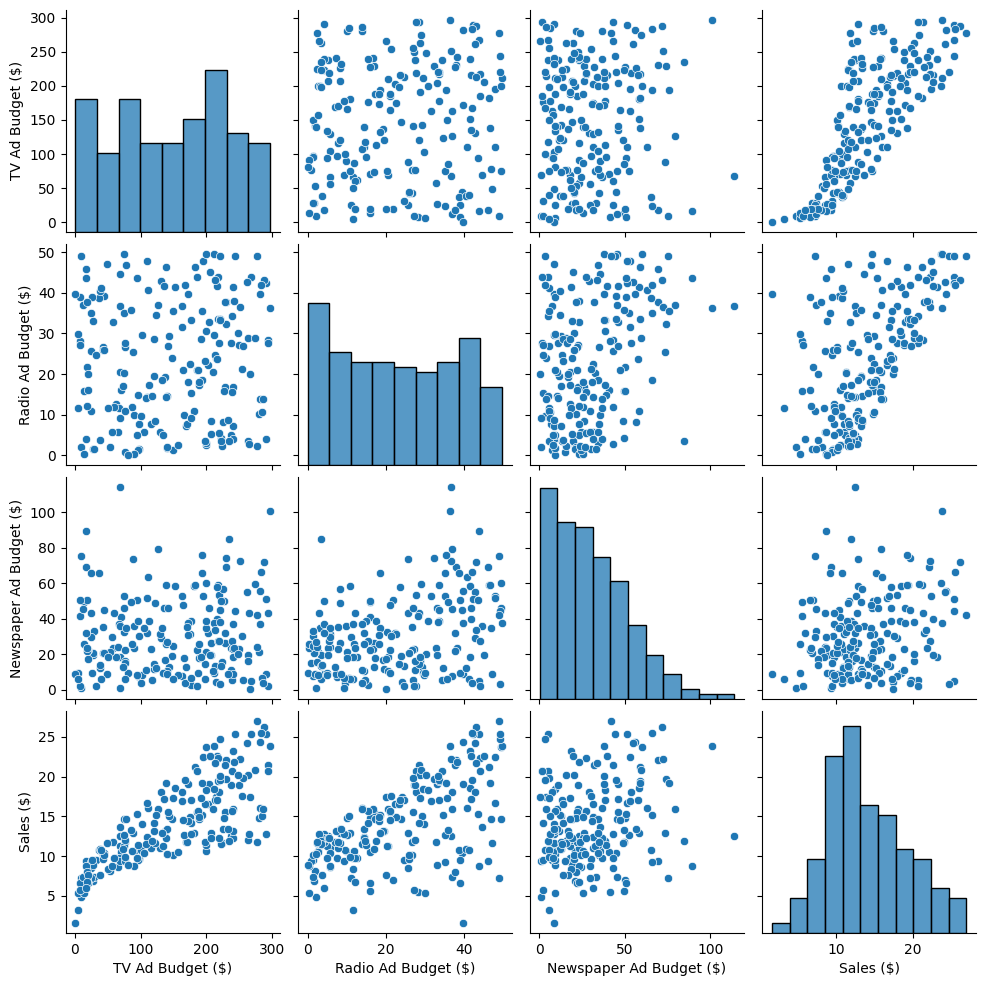

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(df)

## Importing Machine Learning Libraries

This cell imports key modules from scikit-learn for building and evaluating a regression model:

- StandardScaler for feature scaling.
- train_test_split for splitting the dataset into training and testing sets.
- LinearRegression for creating a linear regression model.
- r2_score and mean_squared_error for evaluating the model’s performance.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

## Preparing Features and Target, Splitting Data

This cell separates the dataset into features (X) by dropping the target column 'Sales ($)' and assigns the target variable to Y. It then splits the data into training and testing sets using train_test_split, with 10% of the data reserved for testing and a fixed random state for reproducibility.


In [ ]:
X = df.drop('Sales ($)',axis = 1)
Y = df['Sales ($)']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=42)

## Training the Linear Regression Model

This cell initializes a LinearRegression model and fits it to the training data (X_train and Y_train), allowing the model to learn the relationship between the features and the target variable.


In [ ]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

## Predicting on Test Data

This cell uses the trained linear regression model to predict target values (Sales ($)) for the test feature set (X_test).


In [ ]:
lr.predict(X_test)

array([16.36298922, 20.7912515 , 21.58006443, 10.49229619, 22.06488332,
       13.01380338, 21.00643569,  7.48770971, 13.73616094, 15.17183991,
        9.03043544,  6.69565172, 14.41194798,  8.84738904,  9.78081712,
       12.2362979 ,  8.65790391, 16.303416  , 10.26495433, 18.87027292])

## Evaluating Model Performance

This cell calculates and prints two key metrics to evaluate the linear regression model on the test data:

- **R-squared score (r2_score)**: Measures how well the model explains the variability of the target variable.
- **Mean Squared Error (mean_squared_error)**: Measures the average squared difference between the actual and predicted values, indicating the model’s prediction error.


In [ ]:
lr_r2 = r2_score(Y_test, lr.predict(X_test))
lr_mse = mean_squared_error(Y_test, lr.predict(X_test))
print(f"R-squared score: {lr_r2}")
print(f"Mean Squared Error: {lr_mse}")

R-squared score: 0.9046924770871361
Mean Squared Error: 3.13080209123805


## Visualizing Actual vs Predicted Sales

This cell creates a scatter plot comparing the actual sales values (Y_test) against the predicted sales from the model. The diagonal dashed line (k--) represents the ideal case where predictions perfectly match actual values. This plot helps visually assess the model’s accuracy.


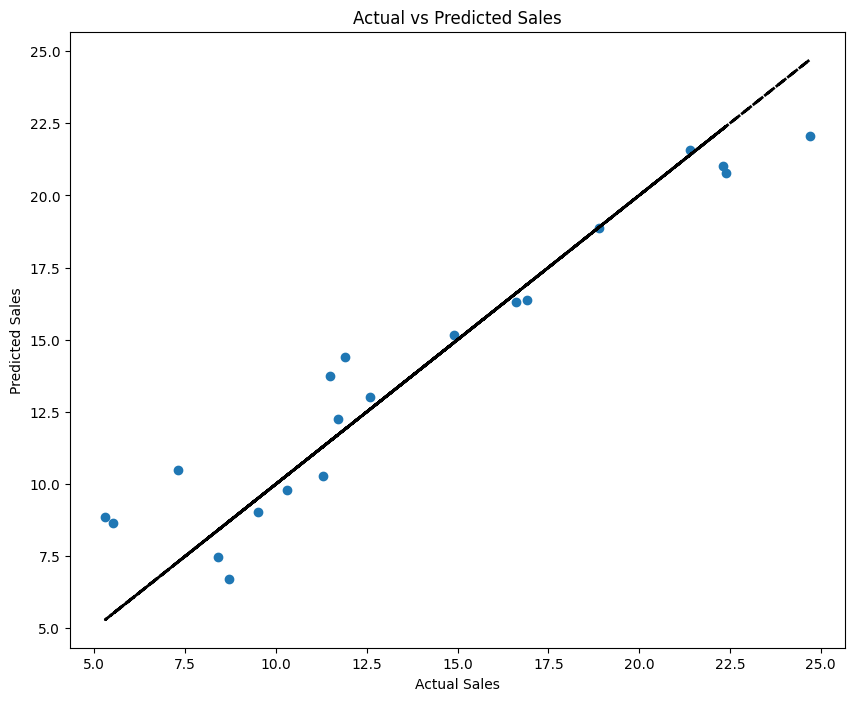

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(Y_test,lr.predict(X_test))
plt.plot(Y_test, Y_test, 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

## Feature Scaling with StandardScaler

This cell initializes a StandardScaler to standardize the feature variables. It fits the scaler on the training features (X_train) and transforms both training and test sets (X_train_sc and X_test_sc) to have zero mean and unit variance, which often improves model performance.


In [ ]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Training Linear Regression Model on Scaled Features

This cell fits the linear regression model using the standardized training features (X_train_sc) and the target values (Y_train), allowing the model to learn from the scaled data.


In [ ]:
lr.fit(X_train_sc,Y_train)

LinearRegression()

## Predicting on Scaled Test Features

This cell uses the trained linear regression model to predict target values (Sales ($)) for the standardized test feature set (X_test_sc).


In [ ]:
lr.predict(X_test_sc)

array([16.36298922, 20.7912515 , 21.58006443, 10.49229619, 22.06488332,
       13.01380338, 21.00643569,  7.48770971, 13.73616094, 15.17183991,
        9.03043544,  6.69565172, 14.41194798,  8.84738904,  9.78081712,
       12.2362979 ,  8.65790391, 16.303416  , 10.26495433, 18.87027292])

## Evaluating Model Performance on Scaled Data

This cell computes and prints the R-squared score and Mean Squared Error of the linear regression model’s predictions on the scaled test data, providing insight into the model’s accuracy after feature scaling.


In [ ]:
lr_r2 = r2_score(Y_test, lr.predict(X_test_sc))
lr_mse = mean_squared_error(Y_test, lr.predict(X_test_sc))
print(f"R-squared score: {lr_r2}")
print(f"Mean Squared Error: {lr_mse}")

R-squared score: 0.904692477087136
Mean Squared Error: 3.130802091238053


## Visualizing Actual vs Predicted Sales (Scaled Features)

This cell plots a scatter graph comparing actual sales values (Y_test) to predicted sales based on the scaled test features (X_test_sc). The dashed diagonal line represents perfect predictions, enabling visual evaluation of model performance after scaling.


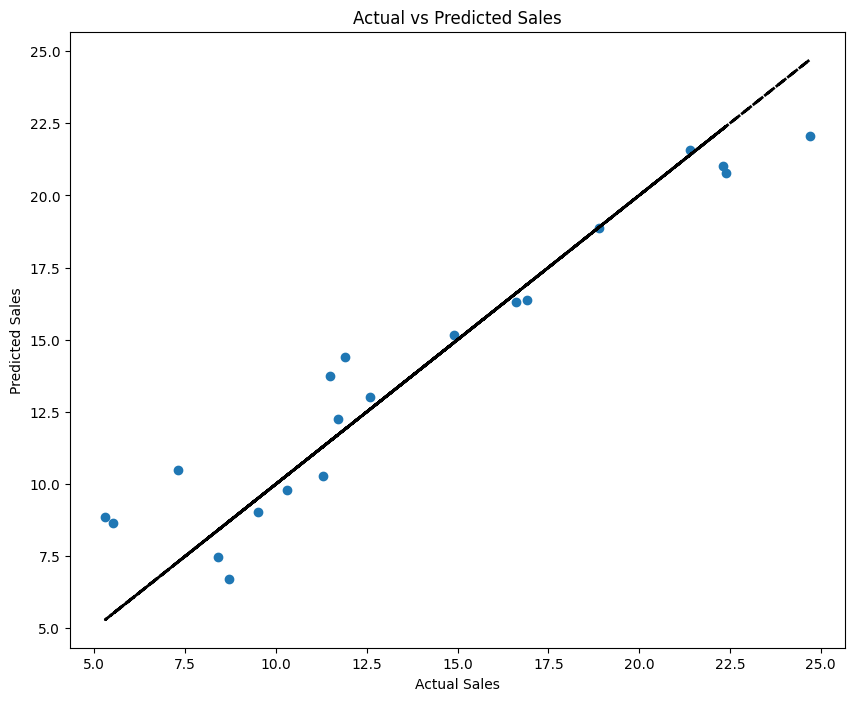

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(Y_test,lr.predict(X_test_sc))
plt.plot(Y_test, Y_test, 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

## Boxplot for Detecting Outliers

This cell creates boxplots for all numerical columns in the DataFrame using Seaborn’s boxplot() function. Boxplots help identify the distribution of the data and detect potential outliers in each feature.


<Axes: >

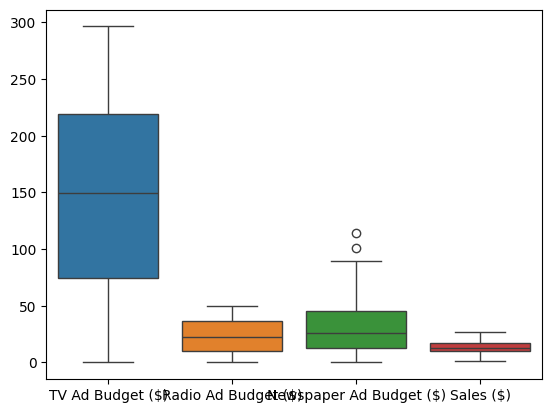

In [ ]:
sns.boxplot(df)

## Removing Outliers in Newspaper Ad Budget

This cell calculates the Interquartile Range (IQR) for the dataset to detect outliers in the `'Newspaper Ad Budget ($)'` column. It defines lower and upper bounds as 1.5 times the IQR below Q1 and above Q3, respectively. Rows with values outside these bounds in the 'Newspaper Ad Budget ($)' column are filtered out, effectively removing outliers. The final shape of the cleaned DataFrame is then displayed.


In [ ]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['Newspaper Ad Budget ($)'] >= lower_bound['Newspaper Ad Budget ($)']) & (df['Newspaper Ad Budget ($)'] <= upper_bound['Newspaper Ad Budget ($)'])]

df.shape

(198, 4)

<Axes: >

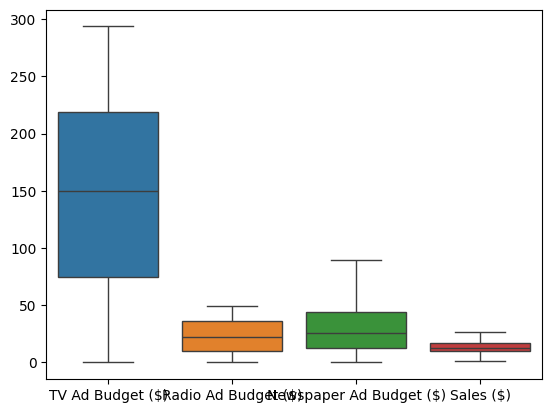

In [ ]:
sns.boxplot(df)